## Two phase flow.
### pezoflow equation.

$$\frac{\partial S_w m}{\partial t} + \frac{\partial}{\partial x}(W_w)=0$$
$$\frac{\partial S_o m}{\partial t} + \frac{\partial}{\partial x}(W_o)=0$$
$$W_w=-\frac{k_{rw} k}{\mu_w}\frac{\partial p}{\partial x}$$
$$W_o=-\frac{k_{ro} k}{\mu_o}\frac{\partial p}{\partial x}$$
$$S_o+S_w=1$$
$$m(p)=m_0+\beta_r*(p-p_0)$$

$$x\in[0,L]$$
$$t\in[0T]$$

*Initial and boundary conditions*
$$p(x, t=0)=p_0$$
$$S_w(x, t=0)=S_{w0}$$
$$W_w(x=0, t)=\frac{Q}{S}$$
$$S_w(x=0, t)=1$$
$$p(x=1, t)=p_0$$

*non dimensions parameters*
$$\overline{p}=\frac{p}{p_0}, \overline{t}=\frac{t}{T}, \overline{x}=\frac{x}{L}$$

1.
$$m\frac{\partial S_w}{\partial t}+S_w\frac{\partial m}{\partial t} + \frac{\partial}{\partial x}(W_w)=0$$
$$m\frac{\partial S_o}{\partial t}+S_o\frac{\partial m}{\partial t} + \frac{\partial}{\partial x}(W_o)=0$$



2.
$$m\frac{\partial S_w}{\partial t}+S_w\beta_r\frac{\partial p}{\partial t} + \frac{\partial}{\partial x}(W_w)=0$$
$$m\frac{\partial (1-S_w)}{\partial t}+(1-S_w)\beta_r\frac{\partial p}{\partial t} + \frac{\partial}{\partial x}(W_o)=0$$



3. summarize
$$\beta_r\frac{\partial p}{\partial t} + \frac{\partial}{\partial x}(W_o+W_w)=0$$
$$\beta_r\frac{\partial p}{\partial t} - \frac{\partial}{\partial x}(k(\frac{k_{rw}}{\mu_w}+\frac{k_{ro}}{\mu_o})\frac{\partial p}{\partial x})=0$$

final
$$\beta_r\frac{\partial p}{\partial t} - \frac{\partial}{\partial x}(k(\frac{k_{rw}}{\mu_w}+\frac{k_{ro}}{\mu_o})\frac{\partial p}{\partial x})=0$$
$$m\frac{\partial S_w}{\partial t}+S_w\beta_r\frac{\partial p}{\partial t} + \frac{\partial}{\partial x}(W_w)=0$$

*non dimensional*
$$\frac{\beta_r p_0}{T}\frac{\partial \overline{p}}{\partial \overline{t}} - \frac{1}{L}\frac{\partial}{\partial \overline{x}}(k(\frac{k_{rw}}{\mu_w}+\frac{k_{ro}}{\mu_o})\frac{p_0}{L}\frac{\partial \overline{p}}{\partial \overline{x}})=0$$
$$\frac{m}{T}\frac{\partial S_w}{\partial \overline{t}}+\frac{S_w\beta_r p_0}{T}\frac{\partial \overline{p}}{\partial \overline{t}} + \frac{1}{L}\frac{\partial}{\partial \overline{x}}(k\frac{k_{rw}}{\mu_w}\frac{p_0}{L}\frac{\partial \overline{p}}{\partial \overline{x}})=0$$

*conditions*
$$\frac{k p_0}{L}\frac{k_{rw}}{\mu_w}\frac{\partial \overline{p}}{\partial \overline{x}} = \frac{Q}{S}$$

*non dimensional final*
$$\beta_r\frac{\partial \overline{p}}{\partial \overline{t}} - \frac{T}{ L^2}\frac{\partial}{\partial \overline{x}}(k(\frac{k_{rw}}{\mu_w}+\frac{k_{ro}}{\mu_o})\frac{\partial \overline{p}}{\partial \overline{x}})=0$$
$$\frac{\partial S_w}{\partial \overline{t}}+\frac{S_w\beta_r p_0}{m}\frac{\partial \overline{p}}{\partial \overline{t}} + \frac{p_0 T}{m L^2}\frac{\partial}{\partial \overline{x}}(k\frac{k_{rw}}{\mu_w}\frac{\partial \overline{p}}{\partial \overline{x}})=0$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.optimize import newton_krylov, minimize

def expit(x):
    return 1 / (1 + np.exp(-x))

k_water = lambda x: 0.6*(x)**2
k_oil = lambda x: 0.2*(x-1)**2

$$\beta_r\frac{\partial \overline{p}}{\partial \overline{t}} - \frac{T}{ L^2}\frac{\partial}{\partial \overline{x}}(k(\frac{k_{rw}}{\mu_w}+\frac{k_{ro}}{\mu_o})\frac{\partial \overline{p}}{\partial \overline{x}})=0$$
$$\frac{\partial S_w}{\partial \overline{t}}+\frac{S_w\beta_r p_0}{m}\frac{\partial \overline{p}}{\partial \overline{t}} + \frac{p_0 T}{m L^2}\frac{\partial}{\partial \overline{x}}(k\frac{k_{rw}}{\mu_w}\frac{\partial \overline{p}}{\partial \overline{x}})=0$$

In [42]:
# Сетка по x
class TwoPhase():
    def __init__(self,
                 mu_h,
                 mu_o,
                 glad,
                 G,
                 mu_water,
                 k,
                 Q,
                 m,
                 beta_r,
                 t_0,
                 T,
                 nt,
                 tt,
                 pow_n,
                 x_0,
                 L,
                 nx,
                 p_0,
                 s_0,
                 s_left,
                 s_right) -> None:
        self.mu_h = mu_h
        self.mu_o = mu_o
        self.glad = glad
        self.G = G
        self.mu_water = mu_water
        self.k = k
        self.Q = Q
        self.m = m
        self.beta_r = beta_r
        self.t_0 = t_0
        self.T = T
        self.nt = nt
        self.tt = tt
        self.pow_n = pow_n
        self.x_0 = x_0
        self.L = L
        self.nx = nx
        self.p_0 = p_0
        self.s_0 = s_0
        self.s_left = s_left
        self.s_right = s_right

        self.time = np.linspace(t_0, T, int(nt))
        self.dt = self.time[1]-self.time[0]
        self.tt = self.time.flat[np.abs(self.time - tt).argmin()]
        self.x = np.linspace(0, L, nx)
        self.dx = self.x[1]-self.x[0]

    def mu_oil(self, grad, mu_oil_x):
        grad = abs(grad)
        mu = (self.mu_h-self.mu_o) * expit (self.glad * (-grad + self.G)) + self.mu_o
        res = np.where(mu < mu_oil_x, mu, mu_oil_x)
        return res

    def rate(self, t):
        n = self.pow_n
        a = self.Q*(self.T-self.t_0) / (self.tt**(n+1)/(n+1) + self.tt**n*(self.T-self.tt))
        return np.where(t<self.tt,a*t**(n),a*self.tt**(n))

    def lam_w(self, s):
        return k_water(s) / self.mu_water

    def lam_o(self, s, grad, mu_oil_x):
        return k_oil(s) / self.mu_oil(grad, mu_oil_x)

    def beta(self, s, grad, mu_oil_x):
        return (self.lam_o(s, grad, mu_oil_x) + self.lam_w(s)) * self.k

    def solution_init(self):
        p = np.zeros((self.nt, self.nx))
        p[0, :] = self.p_0

        s = np.zeros((self.nt, self.nx))
        s[0,:] = self.s_0
        s[:,0] = self.s_left
        return p, s

    def residual(self, u_new, u_old, s_old, mu, t_step, dt, dx):
        """Выражение невязки для метода Ньютона-Крылова."""
        N = len(u_new)
        res = np.zeros(N)
        grad = np.gradient(u_new)
        k_left = (self.beta(s_old[:-2], grad[:-2], mu[:-2]) + self.beta(s_old[1:-1], grad[1:-1], mu[1:-1])) / 2
        k_right = (self.beta(s_old[1:-1], grad[1:-1], mu[1:-1]) + self.beta(s_old[2:], grad[2:], mu[2:])) / 2
        res[1:-1] = self.beta_r*(u_new[1:-1] - u_old[1:-1]) / dt - \
                    (k_right * (u_new[2:] - u_new[1:-1]) / dx**2 - k_left * (u_new[1:-1] - u_new[:-2]) / dx**2)

        # Граничные условия
        res[0] = (u_new[1] - u_new[0]) / dx * k_water(s_old[0]) / self.mu_water*self.k + self.rate(t_step)
        res[-1] = u_new[-1] - self.p_0

        return res

    # Метод Ньютона-Крылова для решения нелинейной системы
    def solve_nonlinear(self, u_old, s_old, mu, t_step, dt, dx):
        """Решение системы уравнений с использованием метода Ньютона-Крылова."""
        u_new_guess = np.copy(u_old)  # начальное предположение
        u_new = newton_krylov(lambda u_new: self.residual(u_new, u_old, s_old, mu, t_step, dt, dx), u_new_guess, f_tol=1e-6)
        return u_new

    # Параметры фракционного потока
    def fw(self, s, p, x):
        """ Функция фракционного потока воды """
        grad = np.gradient(p, x)

        return self.lam_w(s) * self.k * grad

    def solve(self):
        p, s = self.solution_init()
        mu_oil_x = np.zeros(self.nx)+self.mu_h

        # Решение системы с использованием Ньютона-Крылова
        for t, t_step in enumerate(self.time[:-1]):
            # решение уравнения для давления
            p_old = p[t, :].copy()

            if t!=0:
                s_old = s[t-1, :].copy()
            else:
                s_old = s[t, :].copy()

            p_new = self.solve_nonlinear(p_old, s_old, mu_oil_x, t_step, self.dt, self.dx)
            p[t+1, :] = p_new

            # решение уравнения для насыщенности
            fw_val = self.fw(s_old, p_new, self.x)

            s_new = np.zeros_like(s[t,:])
            s_new[1:] = (s_old[1:] + self.dt/(self.m*self.dx) * (fw_val[1:] - fw_val[:-1])) - s_old[1:]*self.beta_r/self.m*(p_new[1:]-p_old[1:])
            s_new[0] = self.s_left
            s[t+1,:] = s_new
            
            if t!=0:
                mu_oil_x = self.mu_oil(np.gradient(p_new, self.x), mu_oil_x)

        return p, s


In [124]:
solver = TwoPhase(mu_h = 2e-3,
                mu_o = 2e-3,
                glad = 0.00002,
                G = 4.4e6,
                mu_water = 8e-4,
                k = 10e-15,
                Q = 0.8/86400,
                m = 0.2,
                beta_r = 1e-13,
                t_0 = 0,
                T = 10*86400,
                nt = 800,
                tt = 0.01*86400,
                pow_n = 2,
                x_0 = 0,
                L = 100,
                nx = 100,
                p_0 = 1e+6,
                s_0 = 0,
                s_left = 1,
                s_right = 1)

p, s = solver.solve()

In [125]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Создаем subplot для размещения двух графиков
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Pressure (p) vs x", "Saturation (s) vs x"))

# Создаем пустые графики для p и s
trace_p = go.Scatter(x=solver.x, y=p[0], mode='lines', name='Pressure (p)')
trace_s = go.Scatter(x=solver.x, y=s[0], mode='lines', name='Saturation (s)')

# Добавляем их на соответствующие позиции
fig.add_trace(trace_p, row=1, col=1)
fig.add_trace(trace_s, row=2, col=1)

# Определяем шаги ползунка, где каждый шаг обновляет данные для каждого момента времени
steps = []
for i in range(solver.nt):
    step = dict(
        method="update",
        args=[{"y": [p[i], s[i]]},  # обновление данных для обоих графиков
              {"title": f"Time step: {i}"}],  # обновление заголовка
        label=f"{i}"
    )
    steps.append(step)

# Добавляем ползунок (slider)
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Time step: "},
    pad={"t": 50},
    steps=steps
)]

# Настраиваем внешний вид графиков
fig.update_layout(
    sliders=sliders,
    height=600,
    width=800,
    showlegend=False,
    title="Interactive Plot for p and s vs x"
)

# Подписи осей
fig.update_xaxes(title_text="x", row=1, col=1)
fig.update_xaxes(title_text="x", row=2, col=1)
fig.update_yaxes(title_text="p", row=1, col=1)
fig.update_yaxes(title_text="s", row=2, col=1)

# Отображаем график
fig.show()


$$\beta_r\frac{\partial \overline{p}}{\partial \overline{t}} - \frac{T}{ L^2}\frac{\partial}{\partial \overline{x}}(k(\frac{k_{rw}}{\mu_w}+\frac{k_{ro}}{\mu_o})\frac{\partial \overline{p}}{\partial \overline{x}})=0$$
$$\frac{\partial S_w}{\partial \overline{t}}+\frac{S_w\beta_r p_0}{m}\frac{\partial \overline{p}}{\partial \overline{t}} + \frac{p_0 T}{m L^2}\frac{\partial}{\partial \overline{x}}(k\frac{k_{rw}}{\mu_w}\frac{\partial \overline{p}}{\partial \overline{x}})=0$$

In [ ]:
# Инициализация давления
p = np.zeros((nt, nx))

p[0, :] = p_0/p_0

# Инициализация насыщенности
s = np.zeros((nt, nx))

s[0,:] = 0.
s[:,0] = 1

# Функция проводимости
def lam_w(s):
    return k_water(s) / mu_water

def lam_o(s, grad, mu_oil_x):
    return k_oil(s) / mu_oil(grad, mu_oil_x)

def beta(s, grad, mu_oil_x):
    return (lam_o(s, grad, mu_oil_x) + lam_w(s)) * k


def residual(u_new, u_old, s_old, mu, t_step, dt, dx):
    """Выражение невязки для метода Ньютона-Крылова."""
    N = len(u_new)
    res = np.zeros(N)
    grad = np.gradient(u_new, dx)
    k_left = (beta(s_old[:-2], grad[:-2], mu[:-2]) + beta(s_old[1:-1], grad[1:-1], mu[1:-1])) / 2
    k_right = (beta(s_old[1:-1], grad[1:-1], mu[1:-1]) + beta(s_old[2:], grad[2:], mu[2:])) / 2
    # for i in range(1,nx-1):
    #     right = beta(s_old[i], grad[i], mu[i])
    #     left = beta(s_old[i-1], grad[i-1], mu[i-1])
    #     res[i] = beta_r*(u_new[i] - u_old[i]) / dt - \
    #              (right * (u_new[i+1] - u_new[i]) / dx**2 - left * (u_new[i] - u_new[i-1]) / dx**2)
    res[1:-1] = beta_r*(u_new[1:-1] - u_old[1:-1]) / dt - \
                 T/L**2*(k_right * (u_new[2:] - u_new[1:-1]) / dx**2 - k_left * (u_new[1:-1] - u_new[:-2]) / dx**2)

    # Граничные условия (Дирихле)
    res[0] = (u_new[1] - u_new[0]) / dx * k_water(s_old[0]) / mu_water*k*p_0/L + Q
    res[-1] = u_new[-1] - p_0/p_0
    res = res

    return res

# Метод Ньютона-Крылова для решения нелинейной системы
def solve_nonlinear(u_old, s_old, mu, t_step, dt, dx):
    """Решение системы уравнений с использованием метода Ньютона-Крылова."""
    u_new_guess = np.copy(u_old)  # начальное предположение
    u_new = newton_krylov(lambda u_new: residual(u_new, u_old, s_old, mu, t_step, dt, dx), u_new_guess, method='lgmres', x_tol=1e-3)
    # print(u_new.nit)
    return u_new

def weno5_flux(Sw):
    flux = np.zeros_like(Sw)
    eps = 1e-6  # Для предотвращения деления на 0
    flux[0] = (2*Sw[0] + 5*Sw[1] - Sw[2]) / 6
    flux[1] = (-Sw[0] + 5*Sw[1] + 2*Sw[2]) / 6
    flux[-1] = (2*Sw[-3] - 7*Sw[-2] + 11*Sw[-1]) / 6
    flux[-2] = (-Sw[-3] + 5*Sw[-2] + 2*Sw[-1]) / 6

    for i in range(2, len(Sw) - 2):
        # Левые потоки
        f1 = (2*Sw[i-2] - 7*Sw[i-1] + 11*Sw[i]) / 6
        f2 = (-Sw[i-1] + 5*Sw[i] + 2*Sw[i+1]) / 6
        f3 = (2*Sw[i] + 5*Sw[i+1] - Sw[i+2]) / 6

        # Веса для WENO
        beta1 = 13/12 * (Sw[i-2] - 2*Sw[i-1] + Sw[i])**2 + 1/4 * (Sw[i-2] - 4*Sw[i-1] + 3*Sw[i])**2
        beta2 = 13/12 * (Sw[i-1] - 2*Sw[i] + Sw[i+1])**2 + 1/4 * (Sw[i-1] - Sw[i+1])**2
        beta3 = 13/12 * (Sw[i] - 2*Sw[i+1] + Sw[i+2])**2 + 1/4 * (3*Sw[i] - 4*Sw[i+1] + Sw[i+2])**2

        alpha1 = 0.1 / (eps + beta1)**2
        alpha2 = 0.6 / (eps + beta2)**2
        alpha3 = 0.3 / (eps + beta3)**2

        w1 = alpha1 / (alpha1 + alpha2 + alpha3)
        w2 = alpha2 / (alpha1 + alpha2 + alpha3)
        w3 = alpha3 / (alpha1 + alpha2 + alpha3)

        flux[i] = w1 * f1 + w2 * f2 + w3 * f3
    
    return flux

def gradient(p, x):
    grad = np.gradient(p, x)

    # grad = np.zeros_like(p)
    # grad[1:] = (p[1:] - p[:-1]) / (dx)
    # grad[0] = (p[1] - p[0]) / dx

    # grad = np.zeros_like(p)
    # grad[1:-1] = (p[2:] - p[:-2]) / (2*dx)
    # grad[0] = (p[1] - p[0]) / dx
    # grad[-1] = (p[-1] - p[-2]) / dx

    # grad = np.zeros_like(p)
    # grad[:-1] = (p[1:] - p[:-1]) / (dx)
    # grad[-1] = (p[-1] - p[-2]) / dx
    return grad

# Параметры фракционного потока
def fw(s, p, x):
    """ Функция фракционного потока воды """
    grad = np.gradient(p, dx)

    return lam_w(s) * k * grad

# Решение системы с использованием Ньютона-Крылова
for t, t_step in enumerate(time[:-1]):
    # решение уравнения для давления
    p_old = p[t, :].copy()

    if t!=0:
        s_old = s[t-1, :].copy()
    else:
        s_old = s[t, :].copy()

    p_new = solve_nonlinear(p_old, s_old, mu_oil_x, t_step, dt, dx)
    p[t+1, :] = p_new

    # решение уравнения для насыщенности
    fw_val = fw(s_old, p_new, x)
    # fw_val = weno5_flux(fw_val)
    s_new = np.zeros_like(s[t,:])
    s_new[1:-1] = s_old[1:-1] + (dt*p_0*T)/(m*L**2*dx) * (fw_val[1:-1] - fw_val[:-2]) - s_old[1:-1]*(beta_r*p_0)/m*(p_new[1:-1]-p_old[1:-1])
    # for i in range(1,nx-1):
    #     s_new[i] = s_old[i] + dt/(dx**2*m)*((k*k_water(s_old[i])/mu_water)*(p_new[i+1]-p_new[i])-(k*k_water(s_old[i-1])/mu_water)*(p_new[i]-p_new[i-1]))-s_old[i]*beta_r*(p_new[i]-p_old[i])/m
    s_new[0] = 1
    s_new[-1] = s_new[-2]
    s[t+1,:] = s_new
    
    if t!=0:
        mu_oil_x = mu_oil(np.gradient(p_new, x), mu_oil_x)
    if t%50==0 or t_step==time[-2]:
        x_e, s_e = exact(t_step*T)
        print(t_step/time[-1])
        plt.plot(x*L, p_new*p_0, label='p')
        plt.legend()
        plt.show()
        # plt.plot(x, mu_oil_x, label='mu_oil')
        # plt.legend()
        # plt.show()
        # plt.plot(x, np.gradient(p_new, x), x, -np.ones_like(x)*G, label='grad p')
        # plt.legend()
        # plt.show()
        plt.plot(x*L, s_new, '--')
        plt.plot(x_e, s_e)
        plt.show()
        


C:\Users\damir.aminev\AppData\Local\Temp\ipykernel_3840\3339417231.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Sx3 = np.array([Sc, Swi0])


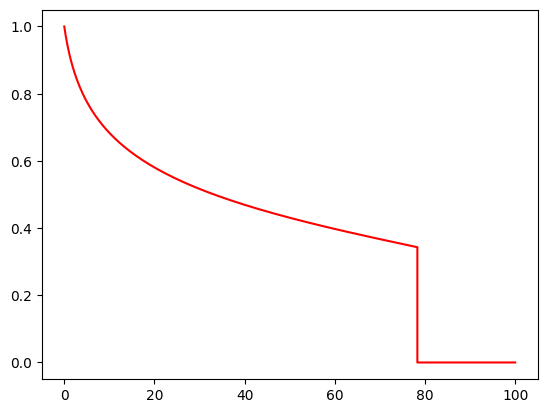

In [21]:
from scipy.optimize import fsolve

def exact(t):
    dk_water = lambda x: 1.2*x
    dk_oil = lambda x: 0.4*(x-1)

    Swi0 = 0

    def f(sat):
        return k_water(sat)/(k_water(sat)+mu_water/mu_o*k_oil(sat))

    def df(sat):
        return (dk_water(sat)*(k_water(sat)+mu_water/mu_o*k_oil(sat))-k_water(sat)*(dk_water(sat)+mu_water/mu_o*dk_oil(sat)))/(k_water(sat)+mu_water/mu_o*k_oil(sat))**2

    def opt(sat):
        return f(sat)-f(Swi0)-df(sat)*(sat-Swi0)

    Sc = fsolve(opt, 0.5)
    Xc = Q/m*(f(Sc)-f(Swi0))/(Sc-Swi0)*t_end
    Sx1 = np.zeros(100)
    X1 = np.zeros(100)
    Sx2 = np.zeros(100)
    X2 = np.zeros(100)
    Sx1[0] = 1
    Sx2[0] = Swi0
    X2[0] = Xc
    for i in range(1,100):
        Sx1[i] = Sx1[i-1]-(1-Sc)/99 
        Sx2[i] = Swi0
        X2[i] = X2[i-1] + (L-Xc)/99
    for i in range(1,100):
        X1[i] = Q/m * df(Sx1[i]) * t_end
    X3 = np.array([Xc[0], Xc[0]])
    Sx3 = np.array([Sc, Swi0])
    return np.concatenate((X1,X3,X2)), np.concatenate((Sx1,Sx3,Sx2))

x, S = exact(86400*10)

plt.plot(x, S, 'r' )
plt.show()
# plt.plot(x,S)
# plt.xlim(0,L)

C:\Users\damir.aminev\AppData\Local\Temp\ipykernel_3840\3070675118.py:96: RuntimeWarning: invalid value encountered in double_scalars
  if u1 < abs((S[i]-Ss[i])/S[i]):


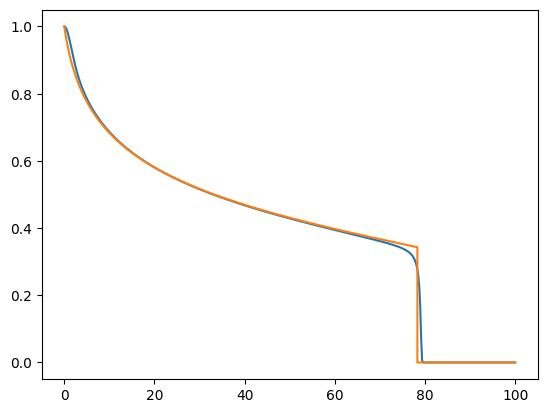

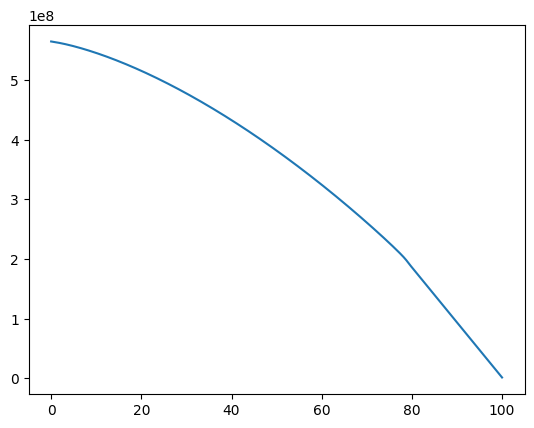

In [34]:
from weno4 import weno4
from weno5 import weno5_flux
from scipy.interpolate import interp1d
import numpy as np


N = 500
A, B, C, F = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
alfa, beta = np.zeros(N), np.zeros(N)
P, Ps, Pn = np.zeros(N), np.zeros(N), np.zeros(N)
S, Ss, Sn = np.zeros(N), np.zeros(N), np.zeros(N)

t = []
pressure = []

L = 100

Pk = 1e+6
S0 = 0.
Sk = 1

t_end = 86400*10
tau = t_end / (N*5)
eps = 1.e-5
k = 10e-15
m = 0.2
beta_sk = 0
Q = -0.8/86400

x = np.linspace(0, L, N)
x_middle = np.linspace((x[1]-x[0])/2, x[-1]-(x[-1]-x[-2])/2, N-1)
x_p = np.linspace(0, L, N*10)
h = x[1]-x[0]

t.append(0)


k_water = lambda x: 0.6*(x)**2
k_oil = lambda x: 0.2*(x-1)**2


def lam(sat):
    return k*(k_oil(sat)/mu_o+k_water(sat)/mu_water)

P[:] = Pk
S[:] = S0

while t[-1] < t_end:
    for i in range(N):
        Pn[i] = P[i]
        Sn[i] = S[i]
    y = 0
    while y<2:
        y += 1
        for i in range(N):
            Ps[i] = P[i]
            Ss[i] = S[i]

        Ss[0] = Sk
        Ss[-1] = Ss[-2] #(m/tau*Sn[-1]+(k*k_water(Ss[-1])/mu_water())*(Ps[-1]-Ps[-2])/h**2)/(m/tau+beta_sk*(Ps[-1]-Pn[-1])/tau)
        alfa[0] = 1
        beta[0] = -Q*h/lam(Ss[0])

        Ss_weno = weno4(x_middle, x, Ss)

        for i in range(1, N-1):
            A[i] = lam(Ss_weno[i])/h**2#2*lam(Ss[i])*lam(Ss[i+1])/(lam(Ss[i])+lam(Ss[i+1]))/h**2
            B[i] = lam(Ss_weno[i-1])/h**2#2*lam(Ss[i])*lam(Ss[i-1])/(lam(Ss[i])+lam(Ss[i-1]))/h**2
            C[i] = A[i]+B[i]+beta_sk/tau
            F[i] = beta_sk*Pn[i]/tau

        for i in range(1, N-1):
            alfa[i]=A[i]/(C[i]-B[i]*alfa[i-1])
            beta[i]=(B[i]*beta[i-1]+F[i])/(C[i]-B[i]*alfa[i-1])

        P[-1] = Pk#(beta[N-2]+Q*h/lam(Ss[-1]))/(1-alfa[N-2])

        for i in range(N-2, -1, -1):
            P[i]=alfa[i]*P[i+1]+beta[i]

        flux=k*k_water(Ss)/mu_water*np.gradient(P,x)
        flux_weno = weno5_flux(flux)

        for i in range(1,N-1):
            S[i] = Sn[i] + tau/(h*m)*(flux[i]-flux[i-1])-Ss[i]*beta_sk*(P[i]-Pn[i])/m

        S[0] = Sk
        S[-1] = S[-2] #(m/tau*Sn[-1]+(k*k_water(Ss[-1])/mu_water())*(P[-1]-P[-2])/h**2)/(m/tau+beta_sk*(P[-1]-Pn[-1])/tau)

        u = abs((P[1]-Ps[1])/P[1])
        u1 = abs((S[1]-Ss[1])/S[1])

        for i in range(N):
            if u < abs((P[i]-Ps[i])/P[i]):
                u = abs((P[i]-Ps[i])/P[i])
            if u1 < abs((S[i]-Ss[i])/S[i]):
                u1 = abs((S[i]-Ss[i])/S[i])

        oshibka = [u, u1]
        if max(oshibka) < eps:
            break
    t.append(t[-1]+tau)
    pressure.append(P)
plt.plot(x, S)
plt.plot(x_e, s_e)
plt.show()
plt.plot(x,P)
plt.show()